In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.cluster import KMeans
import pydotplus
from IPython.display import Image
%matplotlib inline

#Vaikuttaa kaavioiden ulkoasuun:
sns.set()

In [2]:
df = pd.read_excel('http://taanila.fi/KidCreative.xlsx')
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [3]:
#Tehdään malleille fature-matriisit,joita varten pudotetaan Y-muuttuja
X1 = df.drop(['Buy','Obs No.'], axis=1)
X2 = df.drop(['Buy','Obs No.'], axis=1)
X3 = df.drop(['Buy','Obs No.'], axis=1)
X4 = df.drop(['Buy','Obs No.'], axis=1)

#Tehdään target malleille
y1 = df['Buy']
y2 = df['Buy']
y3 = df['Buy']
y4 = df['Buy']

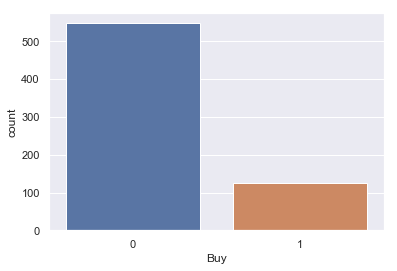

In [4]:
#Tutkitaan, kuinka moni on jo asiakas
sns.countplot(x='Buy', data = df)

In [5]:
#Luodaan jokaiselle mallille jako testidataan ja opetusdataan
X1_train,X1_test,y1_train,y1_test= train_test_split(X1, y1, random_state=5)
X2_train,X2_test,y2_train,y2_test= train_test_split(X2, y2, random_state=5)
X3_train,X3_test,y3_train,y3_test= train_test_split(X3, y3, random_state=5)
X4_train,X4_test,y4_train,y4_test= train_test_split(X4, y4, random_state=5)

In [6]:
#Sovitetaan opetusdata ja testidata malleihin
malli1 = KNeighborsClassifier(n_neighbors=5)
malli2 = GaussianNB()
malli3 = LogisticRegression()
malli4 = tree.DecisionTreeClassifier(max_depth=10)

malli1.fit(X1_train, y1_train)
malli2.fit(X2_train, y2_train)
malli3.fit(X3_train, y3_train)
malli4.fit(X4_train, y4_train)

#Mallien mukaisten ennusteiden laskeminen opetusdatalle ja testidatalle:
y1_train_malli1 = malli1.predict(X1_train)
y2_train_malli2 = malli2.predict(X2_train)
y3_train_malli3 = malli3.predict(X3_train)
y4_train_malli4 = malli4.predict(X4_train)

y1_test_malli1 = malli1.predict(X1_test)
y2_test_malli2 = malli2.predict(X2_test)
y3_test_malli3 = malli3.predict(X3_test)
y4_test_malli4 = malli4.predict(X4_test)

C:\Users\Oem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
#Tutkitaan kuinka hyvin mallit pärjäsivät. Accuracy score kertoo oikeaan osuneiden ennusteiden osuus datoissa
train1= accuracy_score(y1_train, y1_train_malli1)
train2= accuracy_score(y2_train, y2_train_malli2)
train3= accuracy_score(y3_train, y3_train_malli3)
train4= accuracy_score(y4_train, y4_train_malli4)

test1= accuracy_score(y1_test, y1_test_malli1)
test2= accuracy_score(y2_test, y2_test_malli2)
test3= accuracy_score(y3_test, y3_test_malli3)
test4= accuracy_score(y4_test, y4_test_malli4)

In [8]:
print('K-nearest neighbors-mallin tarkkuus opetusdatassa = {}'.format(train1))
print('K-nearest neighbors-mallin tarkkuus testidatassa  = {}'.format(test1)+"\n")
print('Gaussian Naive Bayes-malin tarkkuus opetusdatassa = {}'.format(train2))
print('Gaussian Naive Bayes-malin tarkkuus testidatassa  = {}'.format(test2)+"\n")
print('Logistisen regression tarkkuus opetusdatassa      = {}'.format(train3))
print('Logistisen regression tarkkuus testidatassa       = {}'.format(test3)+"\n")
print('Päätöspuu-menetelmän tarkkuus opetusdatassa       = {}'.format(train4))
print('Päätöspuu-menetelmän tarkkuus testidatassa        = {}'.format(test4))

K-nearest neighbors-mallin tarkkuus opetusdatassa = 0.9345238095238095
K-nearest neighbors-mallin tarkkuus testidatassa  = 0.9230769230769231

Gaussian Naive Bayes-malin tarkkuus opetusdatassa = 0.9325396825396826
Gaussian Naive Bayes-malin tarkkuus testidatassa  = 0.9171597633136095

Logistisen regression tarkkuus opetusdatassa      = 0.9047619047619048
Logistisen regression tarkkuus testidatassa       = 0.8875739644970414

Päätöspuu-menetelmän tarkkuus opetusdatassa       = 1.0
Päätöspuu-menetelmän tarkkuus testidatassa        = 0.9053254437869822


Mallit päräsivät keskimäärin melko hyvin, sillä kaikki paitsi 1 pääsi yli 90 prosenttiin. Parhaana mallina loisti Päätöspuu-menetelmä, joka osui täydellisesti opetusdatassa. Mikäli Income-sarakkeen normittaa, yltää logistinen regressio molemmissa datoissa n. 94 prosenttiin, mutta samalla muiden mallien tulokset heikentyvät.

Text(0.5, 1.0, 'Luokittelumallien oikeaan osuneiden ennusteiden osuus datoissa')

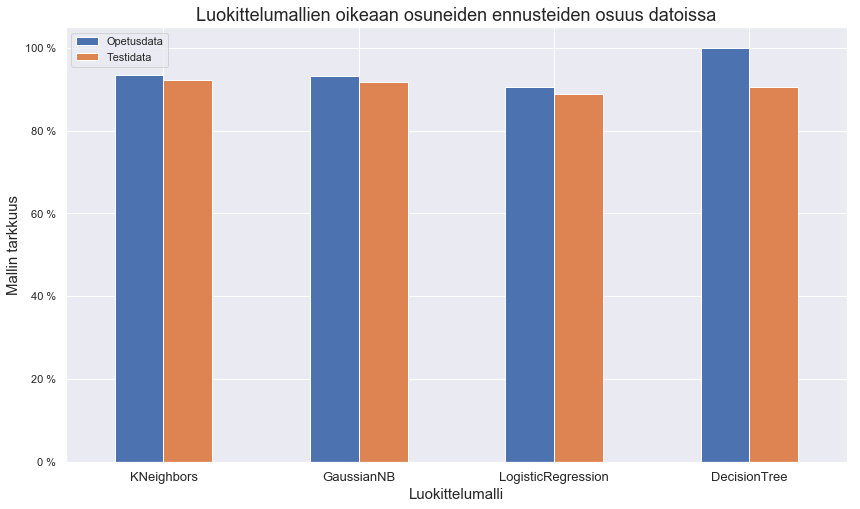

In [9]:
#Havainnot esitettynä kuviona
series=[train1,train2,train3,train4]
series2=[test1,test2,test3,test4]
data = pd.DataFrame(columns=['Opetusdata','Testidata'])
data['Opetusdata'] = series
data['Testidata'] = series2

kuvio = data.plot.bar(figsize=(14,8))

vals = kuvio.get_yticks()
kuvio.set_yticklabels(['{:.0f} %'.format(y*100) for y in vals])
kvartaali = ['KNeighbors', 'GaussianNB', 'LogisticRegression', 'DecisionTree']
kuvio.set_xticklabels(kvartaali, rotation=0,fontsize=13)

kuvio.set_xlabel('Luokittelumalli',fontsize=15)
kuvio.set_ylabel('Mallin tarkkuus',fontsize=15)
kuvio.set_title('Luokittelumallien oikeaan osuneiden ennusteiden osuus datoissa', fontsize=18)

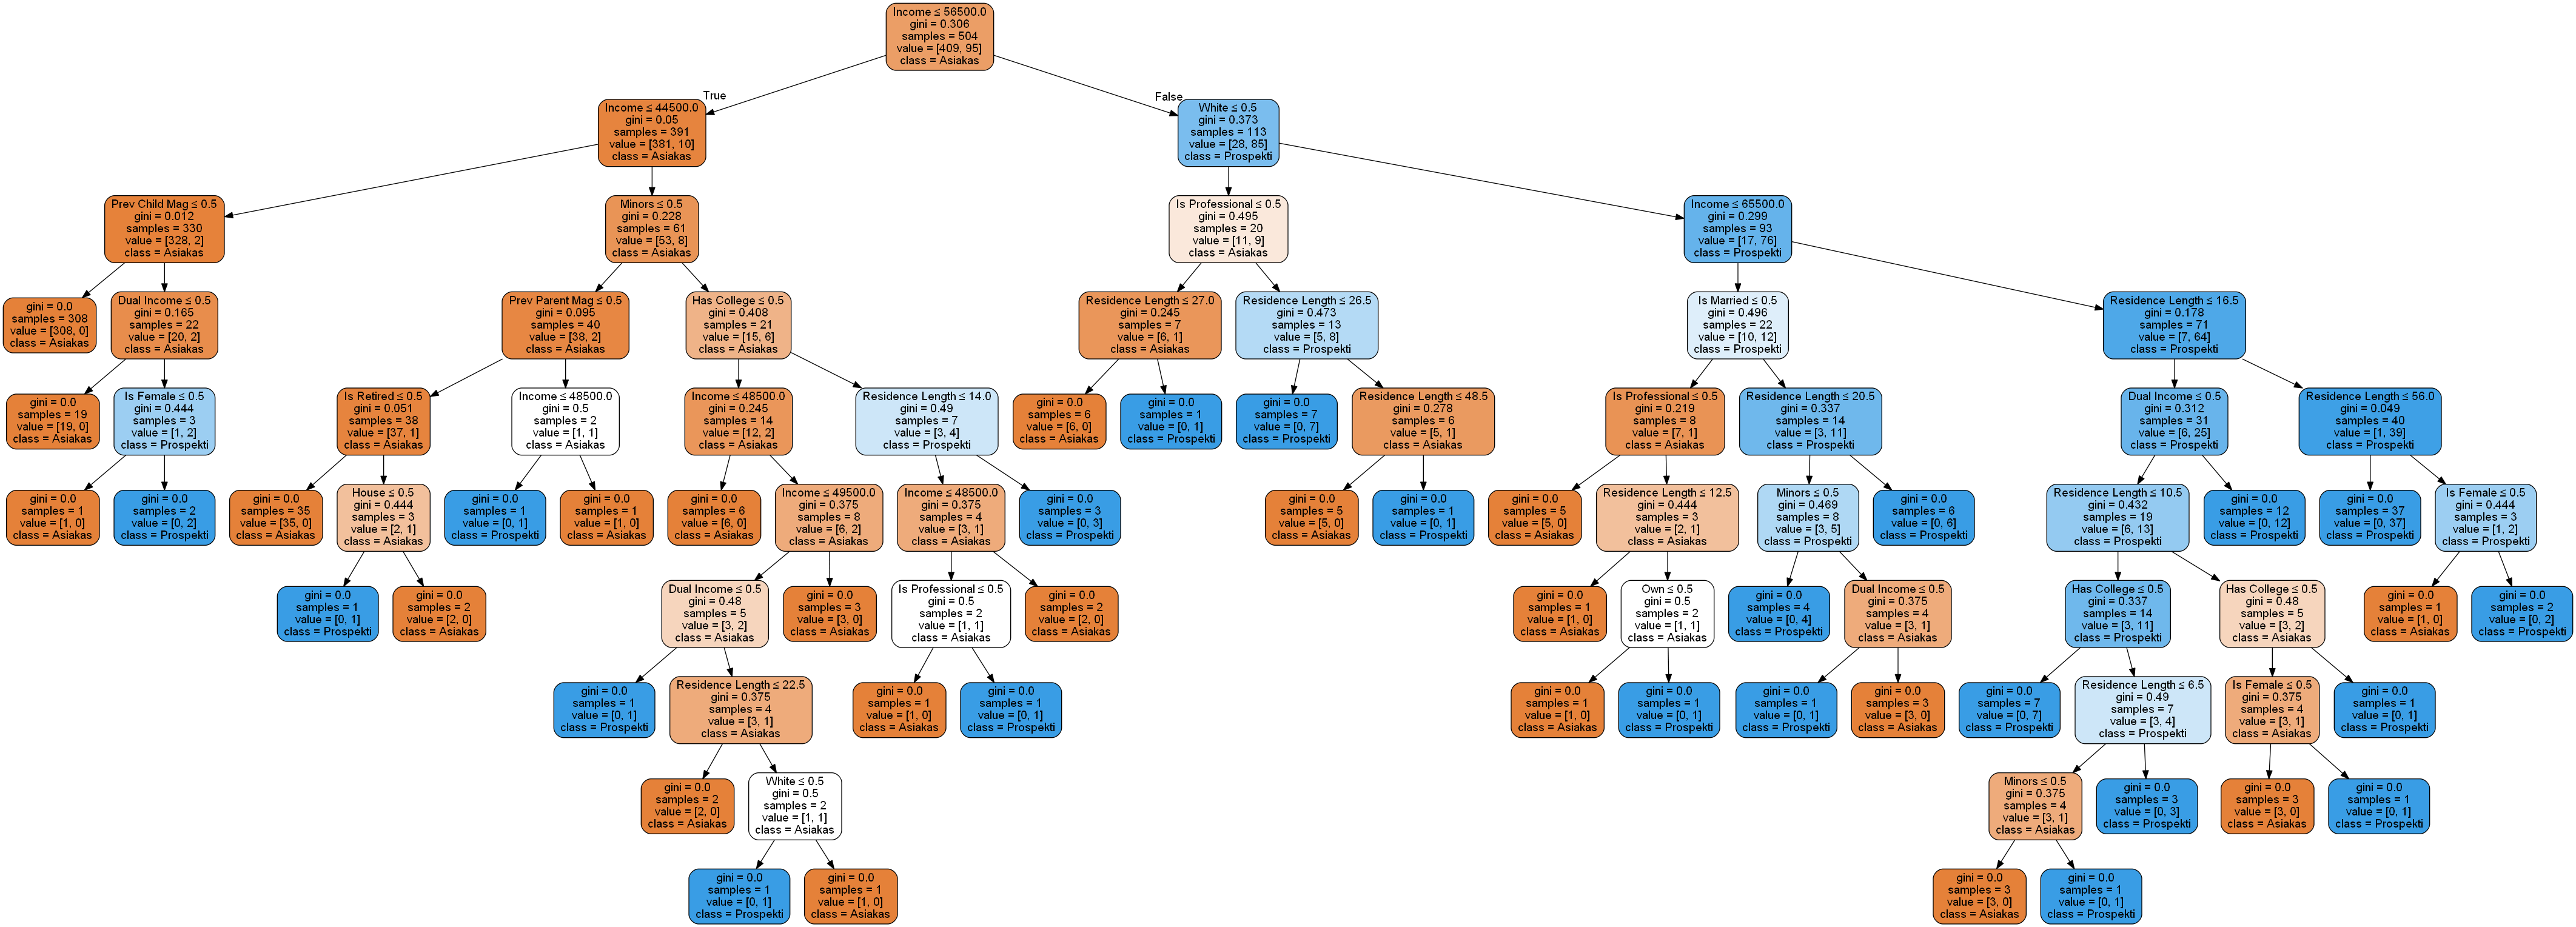

In [10]:
#Päätösåuun graafinen esittäminen
dot_data = tree.export_graphviz(malli4, out_file=None, 
                         feature_names=X4.columns,
                         class_names=['Asiakas', 'Prospekti'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [11]:
#Uusi dataframe KMeans-mallia varten. 
df2 = pd.read_excel('http://taanila.fi/KidCreative.xlsx')
df2['Income2']=(df2['Income']-df2['Income'].mean())/df2['Income'].std()
X5 = df2.drop(['Buy','Income','Obs No.','Residence Length'], axis=1)

In [12]:
#Ryhmien keskukset
malli5 = KMeans(n_clusters=2, random_state=5)
malli5.fit(X5)
predict = malli5.predict(X5)
malli5.cluster_centers_

array([[ 0.57241379,  0.63793103,  0.42758621,  0.51724138,  0.06896552,
         0.00689655,  0.43103448,  0.33793103,  0.68965517,  0.82758621,
         0.82413793,  0.94137931,  0.09310345,  0.1       ,  0.95705779],
       [ 0.53524804,  0.1305483 ,  0.18537859,  0.20887728,  0.04960836,
         0.04960836,  0.08093995,  0.38381201,  0.11488251,  0.54569191,
         0.5926893 ,  0.88511749,  0.05483029,  0.07310705, -0.72466516]])

In [14]:
w = pd.crosstab(predict,df['Buy'])
w.columns= ['Ei ole ostanut','On ostanut']
w

,Ei ole ostanut,On ostanut
row_0,,
0,166,124
1,382,1


Ensimmäinen ryhmä vaikuttaisi olevan ne, jotka ovat ostaneet, mutta siihen on mennyt suuri määrä ei-ostaneita. 